In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [353]:
def importData(fi):
    with open(fi, 'r') as f: 
        d = f.readline().strip().split(',')
    d = list(map(lambda x:int(x), d))
    return np.array(d).reshape(9,9)

In [424]:
col_map_std = np.array([ [2,2,2,0,0,0,2,2,2], [2,2,2,0,0,0,2,2,2], [2,2,2,0,0,0,2,2,2], [0,0,0,2,2,2,0,0,0], [0,0,0,2,2,2,0,0,0], [0,0,0,2,2,2,0,0,0], [2,2,2,0,0,0,2,2,2], [2,2,2,0,0,0,2,2,2], [2,2,2,0,0,0,2,2,2] ]) 

In [425]:

def matMap(mat, col_map=""):
    global col_map_std
    colors = col_map if len(col_map)!=0 else col_map_std
    sns.set(rc={'figure.figsize':(4,4)})
    palette = sns.color_palette('Greys', 9).as_hex()

    ax = sns.heatmap(colors, cmap=['#fff', '#ff8585', '#bcbcd9'], cbar=False, fmt='g')
    ax.set(yticklabels=[], xticklabels=[])
    ax.tick_params(left=False, bottom=False)

    for i in [3,6]:
        ax.axvline(x = i, color="black", ymin = 0, ymax = 1, linewidth=2)
        ax.axhline(y = i, color="black", xmin = 0, xmax = 1, linewidth=2)

    for i in range(1,9):
        ax.axvline(x = i, color="black", ymin = 0, ymax = 1, linewidth=0.25)
        ax.axhline(y = i, color="black", xmin = 0, xmax = 1, linewidth=0.25)

    for y in range(mat.shape[0]):
        for x in range(a.shape[1]):
            if mat[y, x]: 
                plt.text(x + 0.5, y + 0.5, int(mat[y, x]),
                        horizontalalignment='center',
                        verticalalignment='center')
            else:
                plt.text(x + 0.5, y + 0.5, "",
                    horizontalalignment='center',
                    verticalalignment='center')
    plt.show()

In [427]:
custom_map = col_map_std.copy()

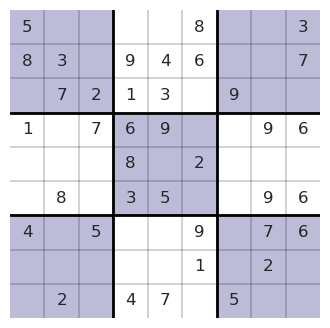

In [428]:
matMap(b, col_map=custom_map)

In [368]:
def calcMax(mat, rev=True):
    unique, counts = np.unique(mat, return_counts=True)
    return dict(sorted(zip(unique[1:], counts[1:]), key=lambda x: x[1], reverse=rev))      

In [451]:
def findHidden(mat, srch):
    x = np.array(list(map(lambda x: not int(x.__contains__(srch)), mat)))
    y = np.array(list(map(lambda x: not int(x.__contains__(srch)), mat.T)))
    t = mat.copy()
    m = mat.copy()
    m[m>0]=-1
    t[t!=srch]=0
    if srch==1: t[t==1]=10
    t = (x[:, None] * y) + t + m
    t[t<0]=0
    return t


In [452]:
def evalQuads(mat):
    rmat = []
    for i in range(3):
        for j in range(3):
            rmat.append(mat[i*3:(i+1)*3,j*3:(j+1)*3])
    nums = [sum(i.flatten()) for i in rmat]
    
    if 1 in nums:
        srch = nums.index(1)
        smat =  rmat[srch]
        idx = [i[0] for i in np.where(smat==1)]
        return [srch, idx]
    else: 
        return False
def setVal(mat, error, value):
    sr, id   = error
    ymap = {0:0,1:1,2:2,3:0,4:1,5:2,6:0,7:1,8:2}
    xmap = {0:0,1:0,2:0,3:1,4:1,5:1,6:2,7:2,8:2}  
    tmp = mat.copy()
    tmp[(xmap[sr]*3)+id[0], (ymap[sr]*3)+id[1]] = value
    return tmp

def correct(mat, fix):
    errorMat = findHidden(mat, fix)
    error =  evalQuads(errorMat)
    if not error:
        return mat, False, 0
    else:
        tmp = mat.copy()
        tmp = setVal(tmp, error, fix)
        return tmp, True, error

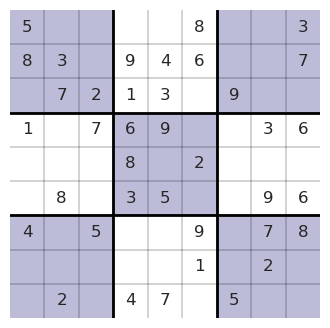

In [442]:
s1 = importData('set2_easy.csv')
matMap(s1)

In [389]:
b = s1.copy()

4 0 ====>


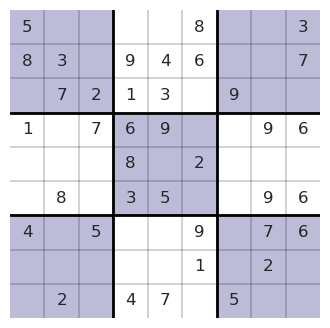

In [390]:
count=0
while True:
    print(i, count, '====>')
    b, ct, p = correct(b, i)
    if ct==False: break
    if count>100: break
    count+=1
matMap(b)

In [416]:
p

0

{1: 9, 4: 9, 5: 9, 7: 9, 8: 9, 3: 6, 6: 5, 9: 5, 2: 4}


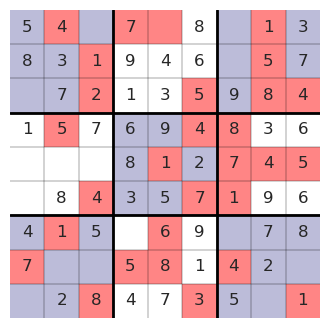

In [455]:
b = s1.copy()
curset = calcMax(b)

for i in list(curset):
    count = 0
    while True:
        b, ct, p = correct(b, i)
        if ct==False: break
        if count>100: break

        custom_map = setVal(custom_map, p, 1)
        count+=1
print(calcMax(b))
matMap(b, col_map=custom_map)

In [460]:
out = ','.join([f'{i}' for i in b.flatten().tolist()])
with open('set_2_step1.csv', 'w') as f: f.write(out)

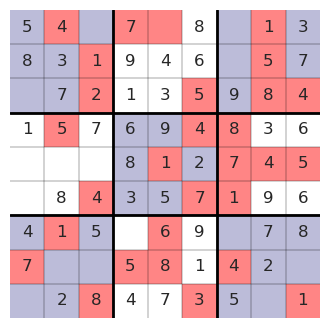

In [462]:
s1 = importData('set_2_step1.csv')
matMap(s1, col_map=custom_map)

In [511]:
def slicer(mat):
    rmat = []
    for i in range(3):
        for j in range(3):
            rmat.append(mat[i*3:(i+1)*3,j*3:(j+1)*3])
    return rmat

def fillHouse(mat):
    rmat = slicer(mat)
    # nums = list(map(lambda x:len(np.trim_zeros(x).tolist()), rmat))
    nums = [len(i.flatten()) for i in rmat]
    subFull = list(zip(range(len(nums)), nums))
    subFull = dict(filter(lambda x : x[1]==9, subFull))
    print(subFull)

fillHouse(s1)

TypeError: len() takes no keyword arguments

In [502]:
rmat = slicer(s1)
a = rmat[0]
v = np.trim_zeros(a[0]).tolist()
